In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from transformers import ViTForImageClassification, ViTImageProcessor

# Load the trained model
MODEL_PATH = r"D:\Major_WBC_Project\Combined_Dataset\Vit_combined_data.pth"
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=5)
model.load_state_dict(torch.load(MODEL_PATH, map_location=torch.device('cpu')))
model.eval()

# Load image processor
image_processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

# Define function to process image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = image_processor(images=image, return_tensors="pt")
    return image, inputs

# Define function for prediction
def predict(image_path, class_names):
    image, inputs = preprocess_image(image_path)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        confidence, predicted_class = torch.max(probabilities, dim=1)
    
    # Show image
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted: {class_names[predicted_class.item()]}\nConfidence: {confidence.item() * 100:.2f}%")
    plt.show()

# Define class labels (update according to your dataset)
class_names = ["Basophil", "Eosinophil", "Lymphocyte", "Monocyte", "Neutrophil"]  # Replace with actual class names

# # Test manually by providing different image paths
# image_paths = [
#     r"D:\Major_WBC_Project\Combined_Dataset\Test\Lympho\1534.jpg",
#     r"D:\Major_WBC_Project\Combined_Dataset\Test\Eosino\_7_1890.jpeg",
#     r"D:\Major_WBC_Project\Combined_Dataset\Test\Neutro\95-5-4-1_425_1.jpg"
# ]

# for img_path in image_paths:
#     print(f"Testing Image: {img_path}")
#     predict(img_path, class_names)


d:\Major_WBC_Project\vtproject\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\anujk\AppData\Local\Temp\ipykernel_15972\1384336310.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the de

Testing Image: D:\Major_WBC_Project\Combined_Dataset\Test\Baso\20190531_113358_0.jpg


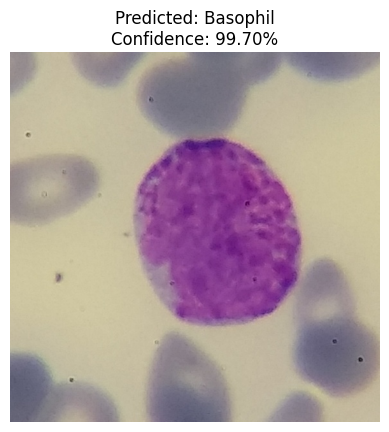

Testing Image: D:\Major_WBC_Project\Combined_Dataset\Test\Neutro\95-5-4-1_425_1.jpg


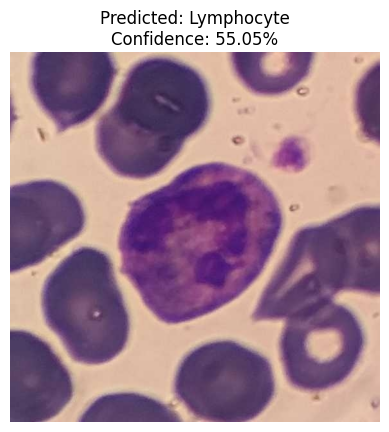

Testing Image: D:\Major_WBC_Project\Combined_Dataset\Test\Eosino\105.jpg


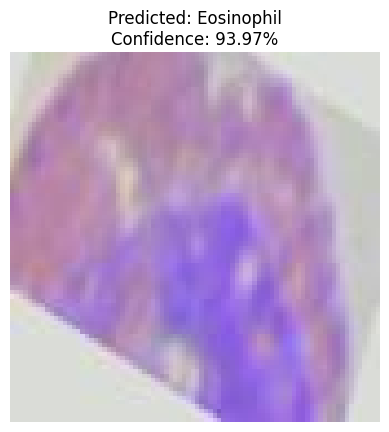

Testing Image: D:\Major_WBC_Project\Combined_Dataset\Test\Mono\MON_00601.jpg


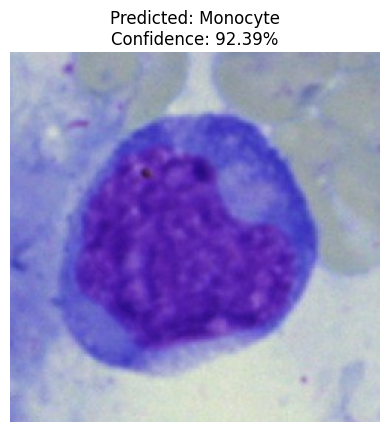

In [2]:
# Test manually by providing different image paths
image_paths = [
    r"D:\Major_WBC_Project\Combined_Dataset\Test\Baso\20190531_113358_0.jpg",
    r"D:\Major_WBC_Project\Combined_Dataset\Test\Neutro\95-5-4-1_425_1.jpg",
    r"D:\Major_WBC_Project\Combined_Dataset\Test\Eosino\105.jpg",
    r"D:\Major_WBC_Project\Combined_Dataset\Test\Mono\MON_00601.jpg"
]

for img_path in image_paths:
    print(f"Testing Image: {img_path}")
    predict(img_path, class_names)

Testing Image: D:\Major_Project\sample_from_lab\sample (1).jpg


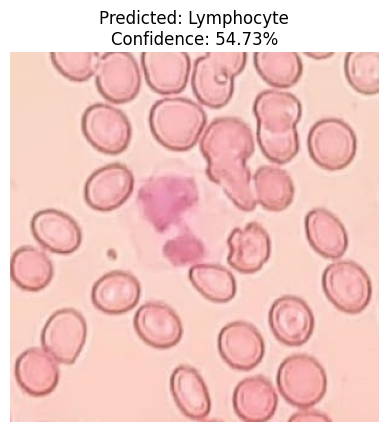

Testing Image: D:\Major_Project\sample_from_lab\sample (2).jpg


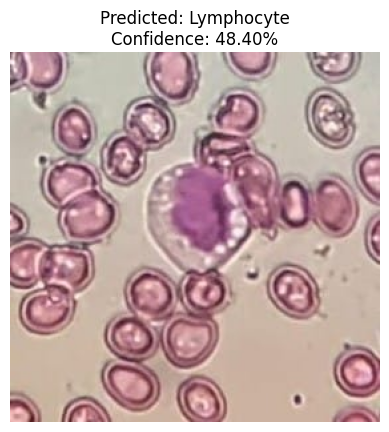

Testing Image: D:\Major_Project\sample_from_lab\sample (3).jpg


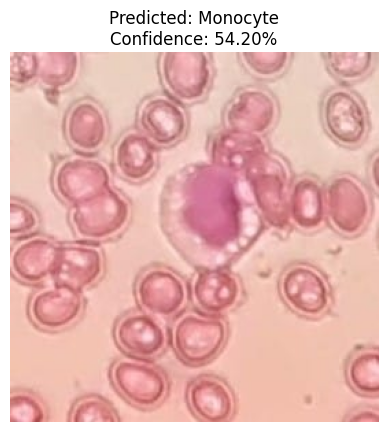

In [ ]:
# Test manually by providing different image paths
image_paths = [
    r"D:\Major_Project\sample_from_lab\sample (1).jpg",
    r"D:\Major_Project\sample_from_lab\sample (2).jpg",
    r"D:\Major_Project\sample_from_lab\sample (3).jpg",
]

for img_path in image_paths:
    print(f"Testing Image: {img_path}")
    predict(img_path, class_names)